# Customer Churn Prediction With Machine Learning 

# Problem Statement: 

    Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

    Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

    Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

    You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score,average_precision_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("Customerchurndata.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Understanding the dataset: 

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. We have 7043 rows and 21 columns in the dataset. 
2. In total, we have 20 independent variables. These are as follows: CustomerID, Gender, SeniorCitizen, Partner, Dependents, Tenure, Phoneservice,Multiplelines,Internetservice,Onlinesecurity,onlinebackup,Deviceprotection,Techsupport, StreamingTV,Streaming movies,Contract,Paperlessbilling, PaymentMethod, Monthlycharges,Totalcharges.
2. We have one dependent/ target variables - Churn (Yes/No). Each independent variable hold a significance influence on the target variable. We will study the same moving ahead.
3. Majority of the data is in object type data format. We will be encoding it further moving ahead. 

# Checking the null values: 

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Cleaning the dataset: 

In [7]:
# Since Customer ID is of no use to us for making prediction further. Let's drop this variable here.
df= df.drop(["customerID"], axis = 1)

In [8]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#Since we got 11 missing values in TotalCharges variable. Filling it with mean of the same.
df.fillna(df["TotalCharges"].mean(),inplace=True)

In [10]:
df.drop(labels=df[df["tenure"] == 0].index, axis = 0, inplace = True)

In [11]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#Checking the unique values SeniorCitizen holds.
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [15]:
df.dropna(inplace = True)
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [40]:
df.describe(include = 'object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


    All rows does have equal number of rows data.
    There are different unique values - 2,3 variables are holding respectively. 
    We will be looking forward what they are actually. 
    Frequency differ as per the variables

# Performing Explorotary Data Analysis: 

In [20]:
df.Churn[df.Churn == 0].groupby(by = df.gender).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

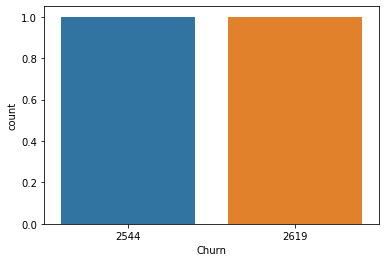

In [24]:
sns.countplot(df.Churn[df.Churn == 0].groupby(by = df.gender).count())

In [22]:
df.Churn[df.Churn == 1].groupby(by = df.gender).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

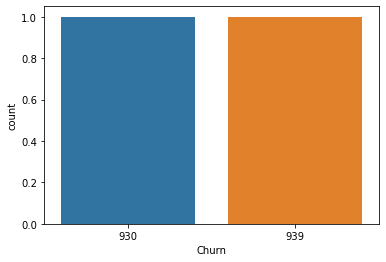

In [23]:
sns.countplot(df.Churn[df.Churn == 1].groupby(by = df.gender).count())

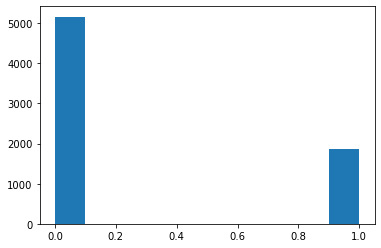

In [27]:
fig = plt.hist(df['Churn'])

In [28]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              0        992
Fiber optic      0        910
No               0        717
Fiber optic      1        633
DSL              1        240
No               1         57
dtype: int64

<AxesSubplot:ylabel='count'>

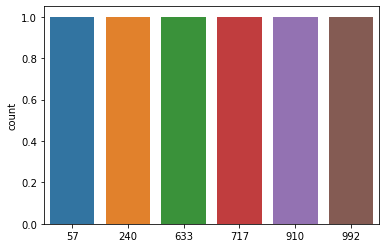

In [29]:
sns.countplot( df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts())

In [30]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              0        965
Fiber optic      0        889
No               0        690
Fiber optic      1        664
DSL              1        219
No               1         56
dtype: int64

<AxesSubplot:ylabel='count'>

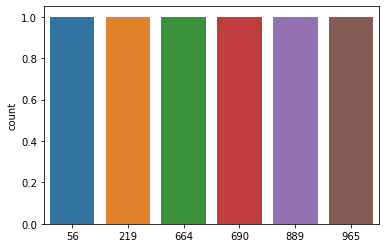

In [31]:
sns.countplot(df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts())

In [63]:
# Unique values each variable is holding.
for i in df.columns:
    print(i, ": ", df[i].unique())

gender :  [0 1]
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  [0 1]
MultipleLines :  [1 0 2]
InternetService :  [0 1 2]
OnlineSecurity :  [0 2 1]
OnlineBackup :  [2 0 1]
DeviceProtection :  [0 2 1]
TechSupport :  [0 2 1]
StreamingTV :  [0 2 1]
StreamingMovies :  [0 2 1]
Contract :  [0 1 2]
PaperlessBilling :  [1 0]
PaymentMethod :  [2 3 0 1]
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  [0 1]


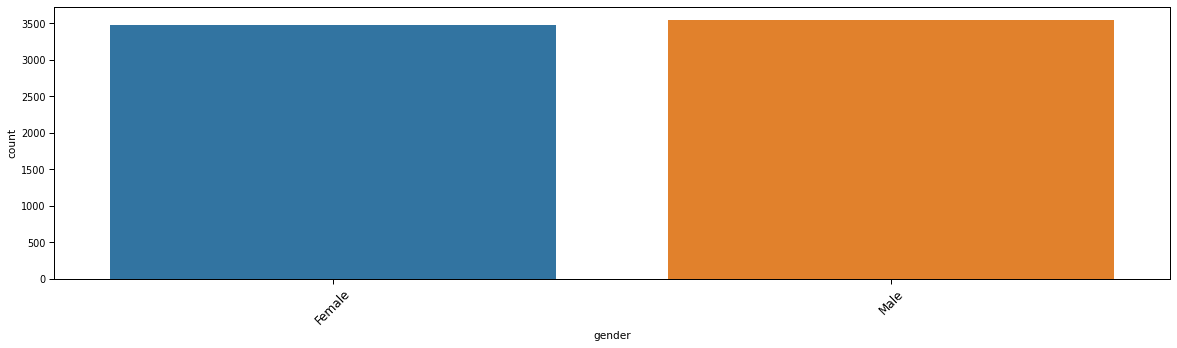

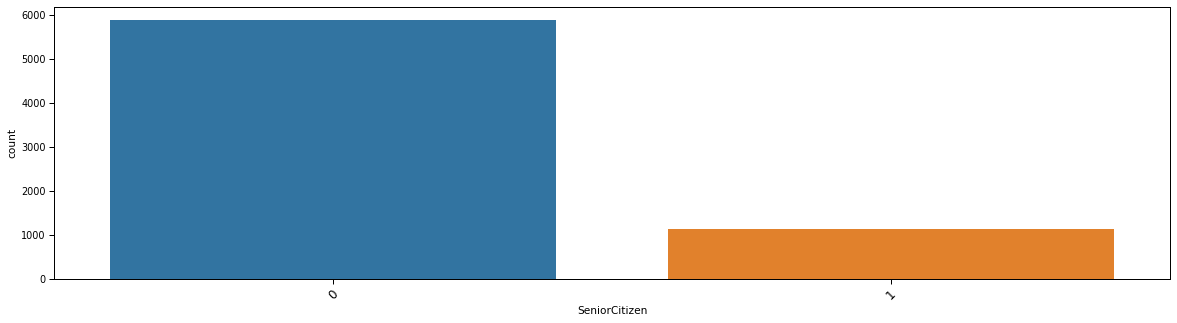

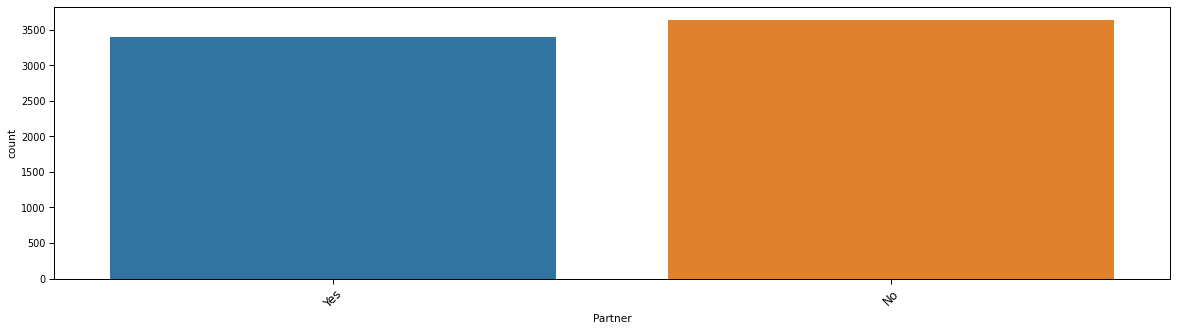

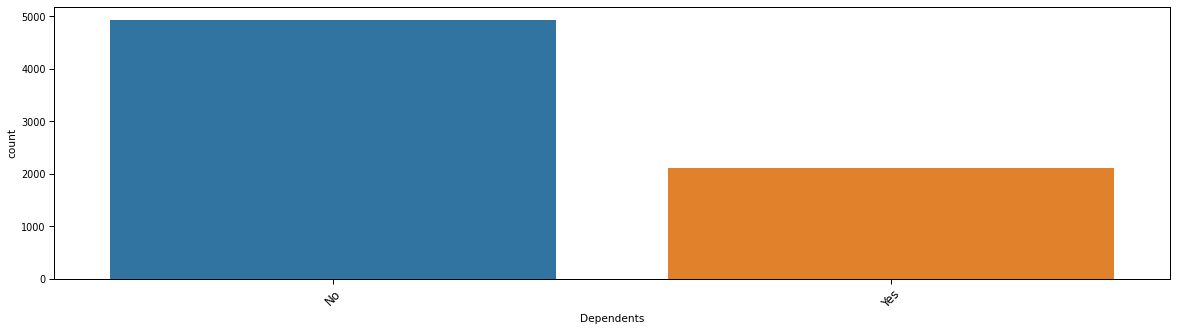

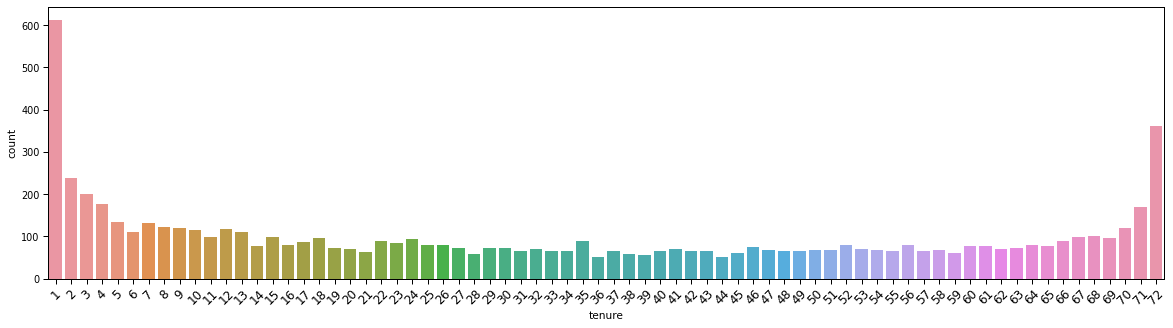

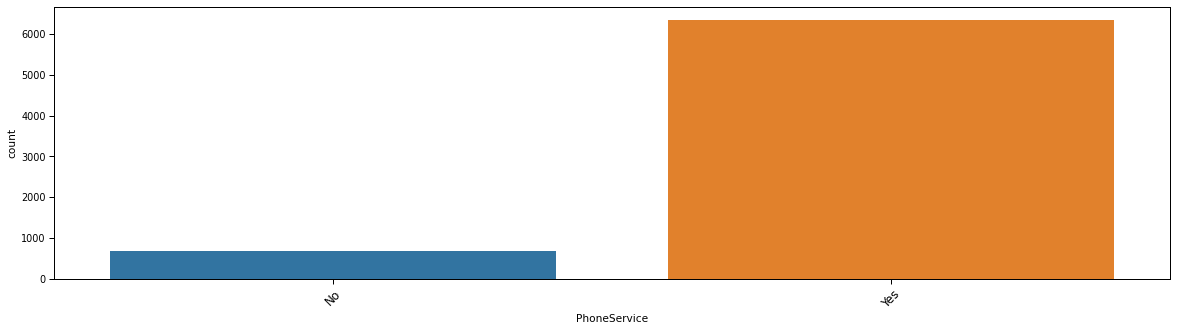

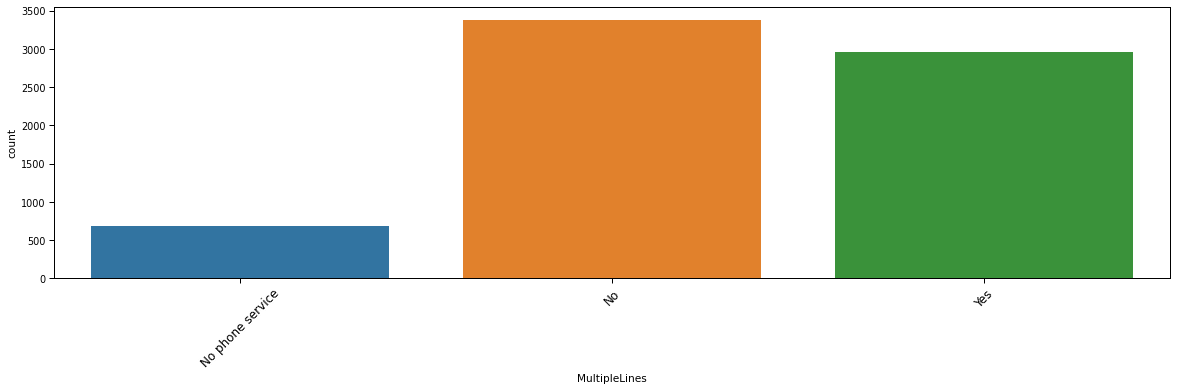

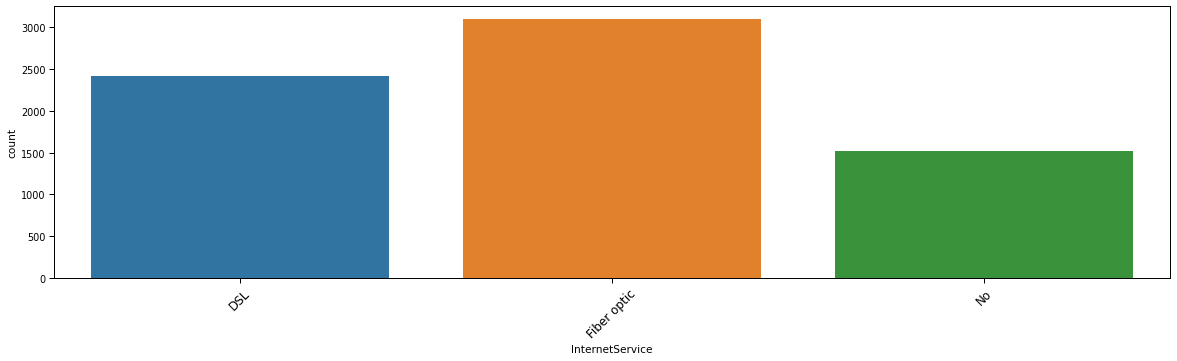

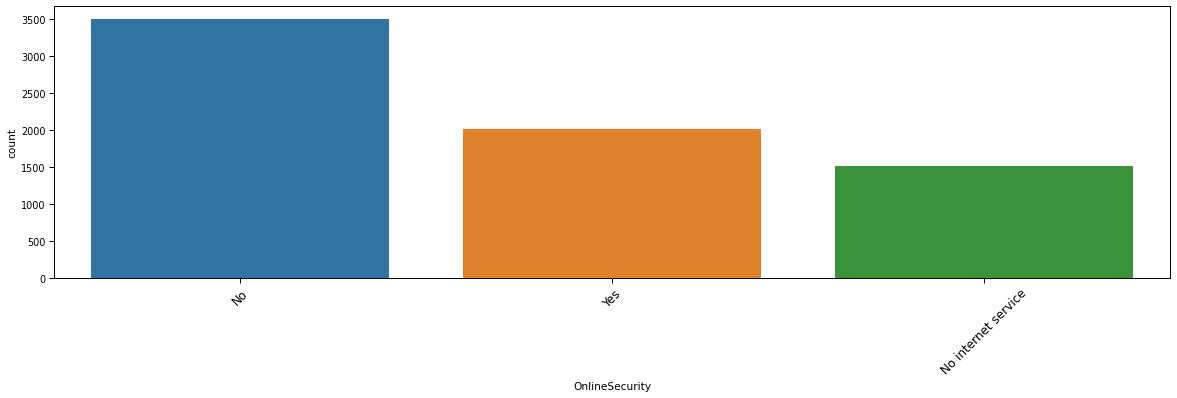

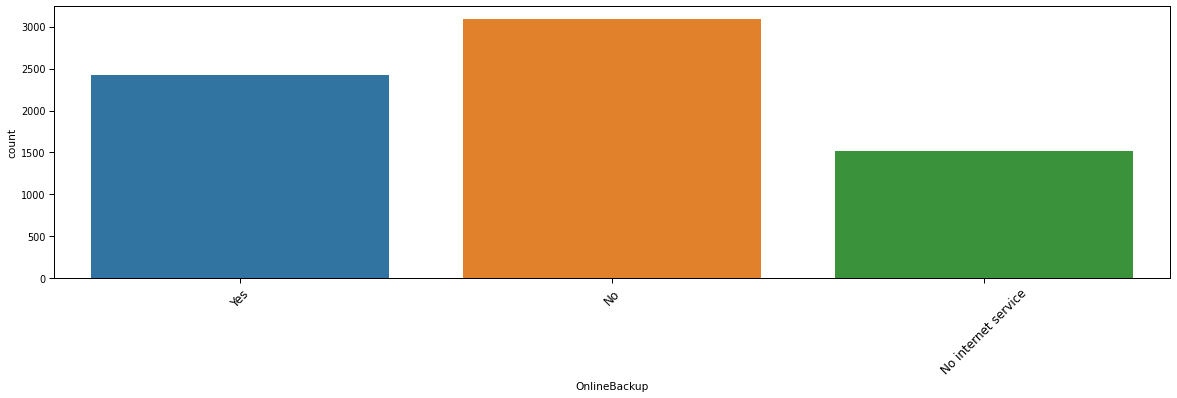

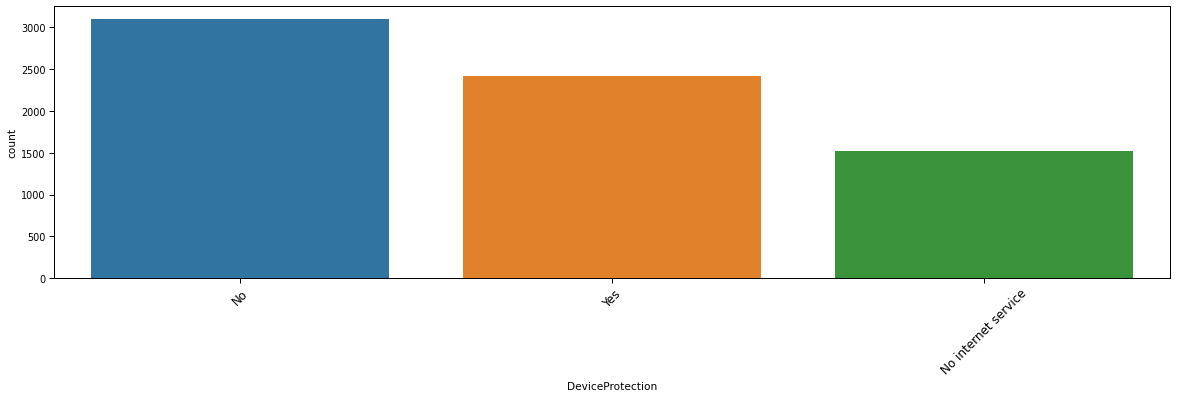

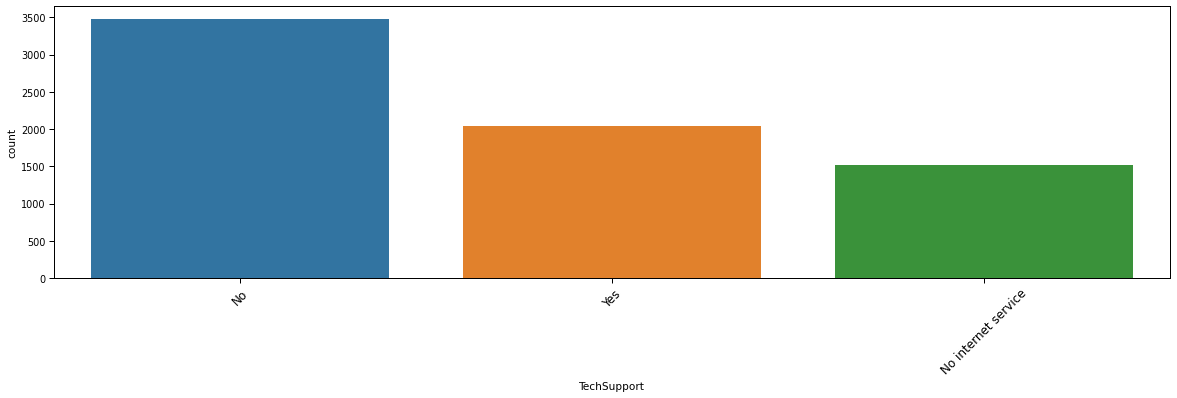

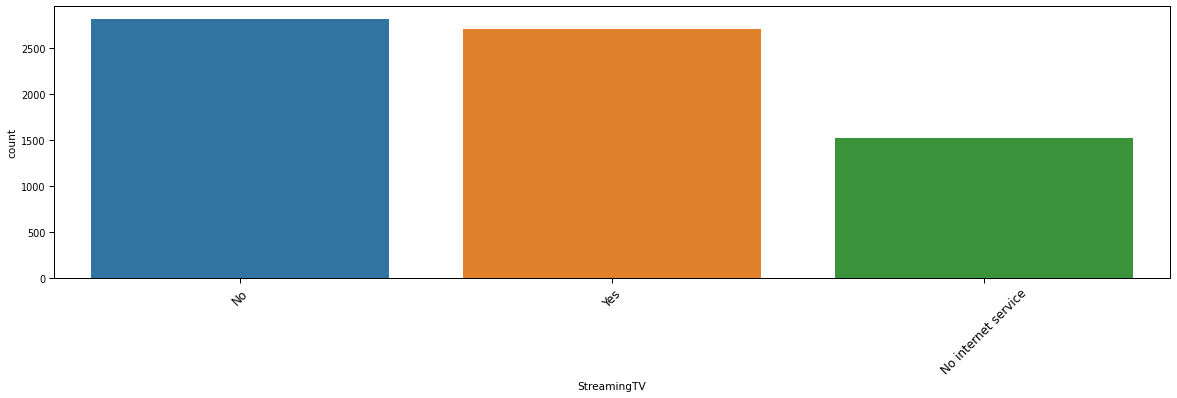

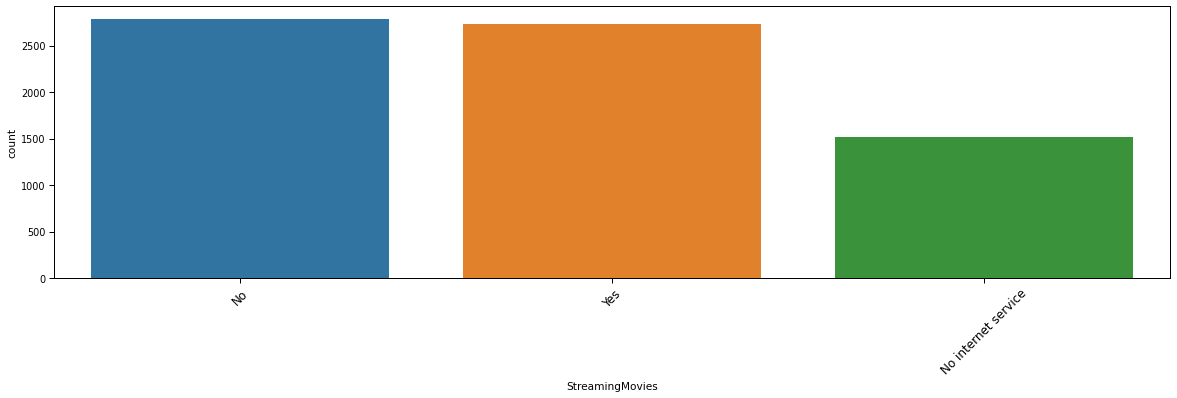

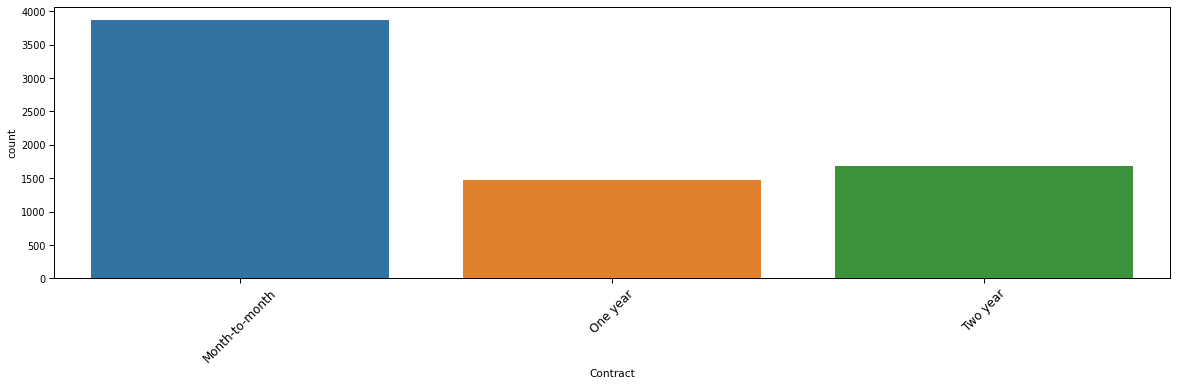

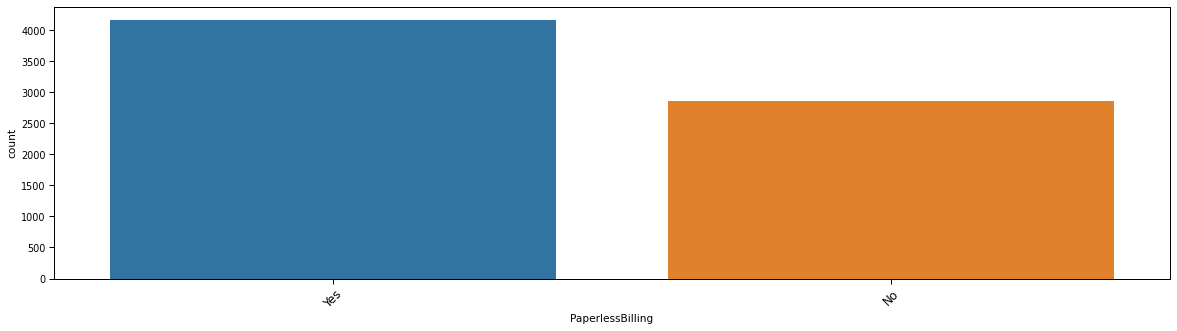

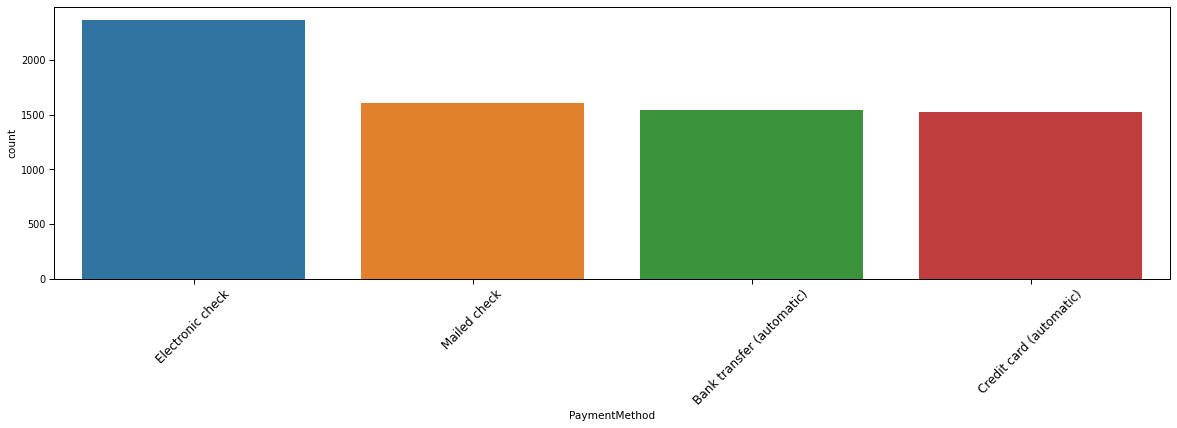

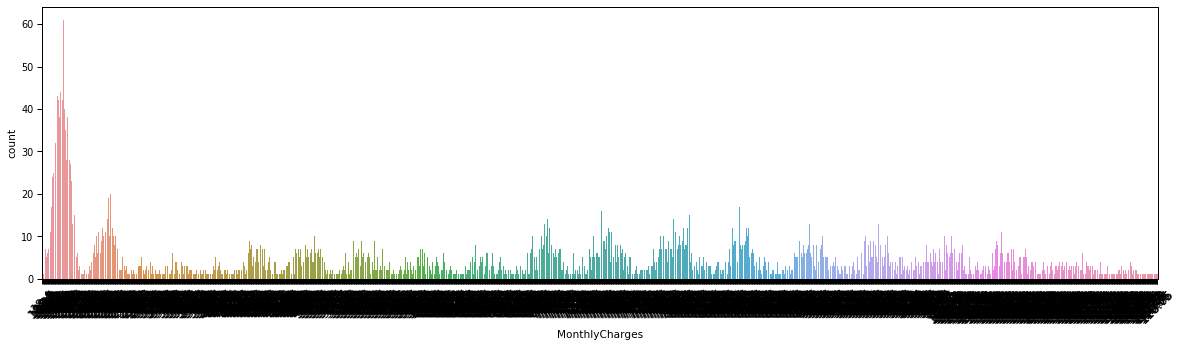

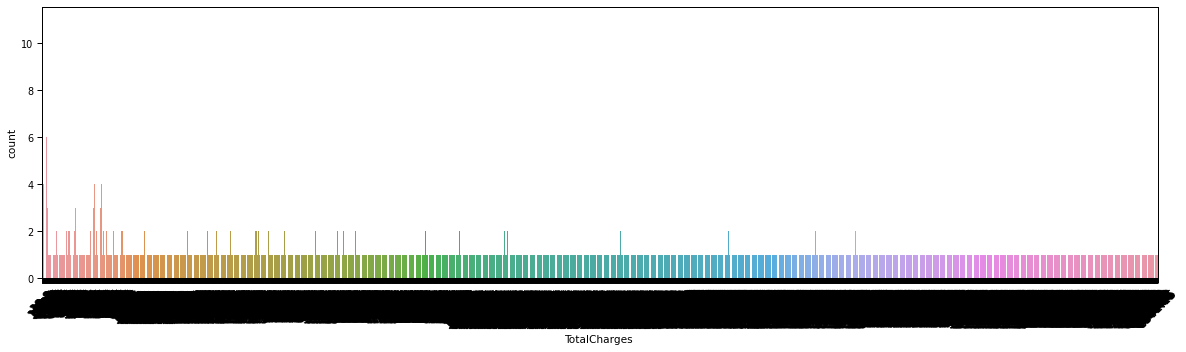

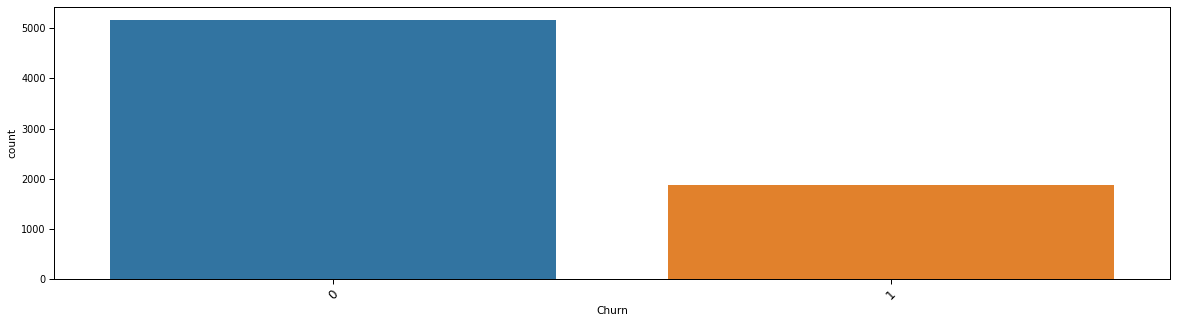

The image has been saved


In [41]:
for i in df.columns:
    plt.figure(figsize = (20,5))
    sns.countplot (x=i, data = df)
    plt.xticks(fontsize = 12, rotation=45)
    plt.savefig('Unique_Features.jpeg')
    plt.show()
    
print ("The image has been saved")

Observation: 
    
    1. Gender does have male and females data, almost equivalent.
    2. Generally Senior Citizen are quite less in number.
    3. Generally people who are not partners are more in number in the dataset.
    4. Number of people who are not dependents are more in number.

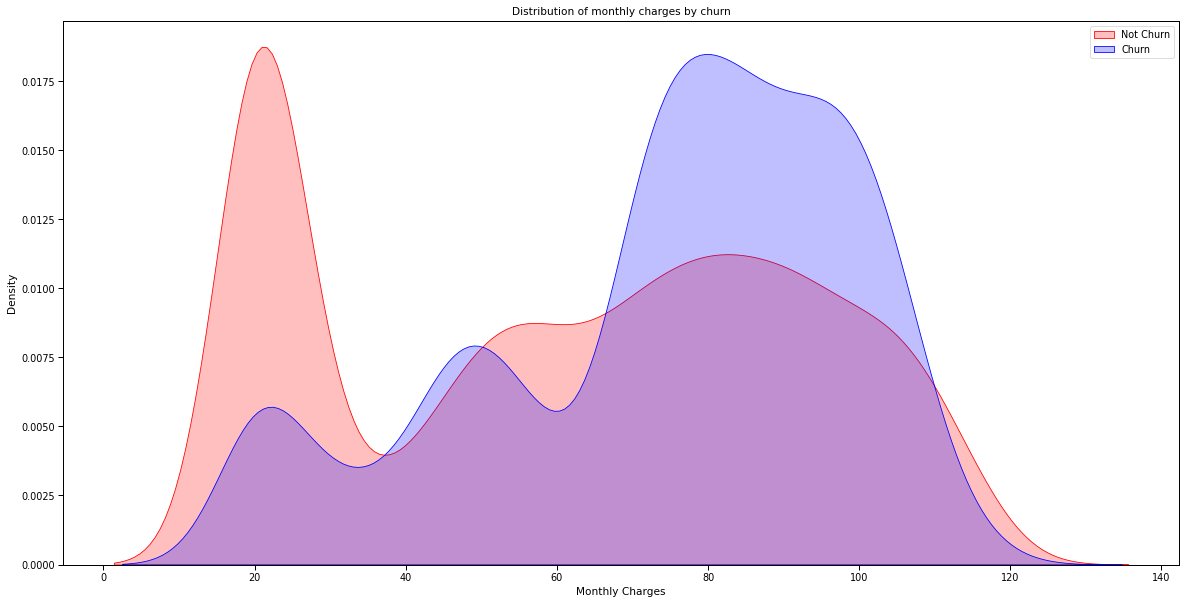

In [37]:
plt.figure(figsize=[20,10])
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

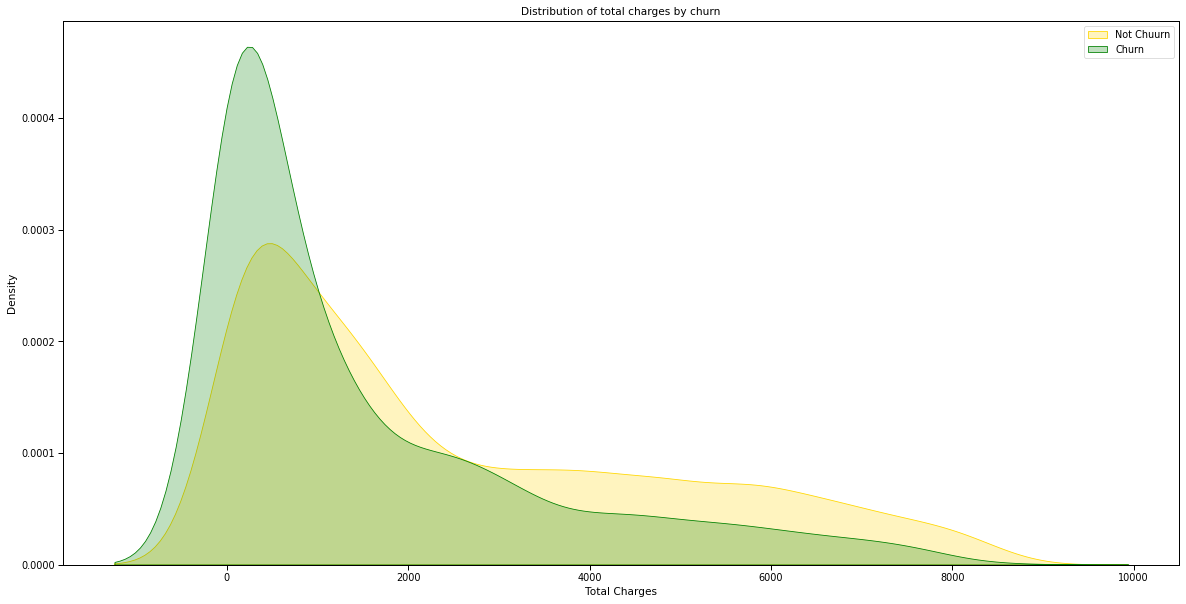

In [38]:
plt.figure(figsize=[20,10])
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chuurn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

Observation: 
    
    Customer who are having high monthly charges comparitevly, they are more prone to churn then those who have less monthly charges.

In [43]:
# Label encoding 
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [45]:
df['gender']=le.fit_transform(df['gender'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


In [47]:
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])

In [51]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


<AxesSubplot:>

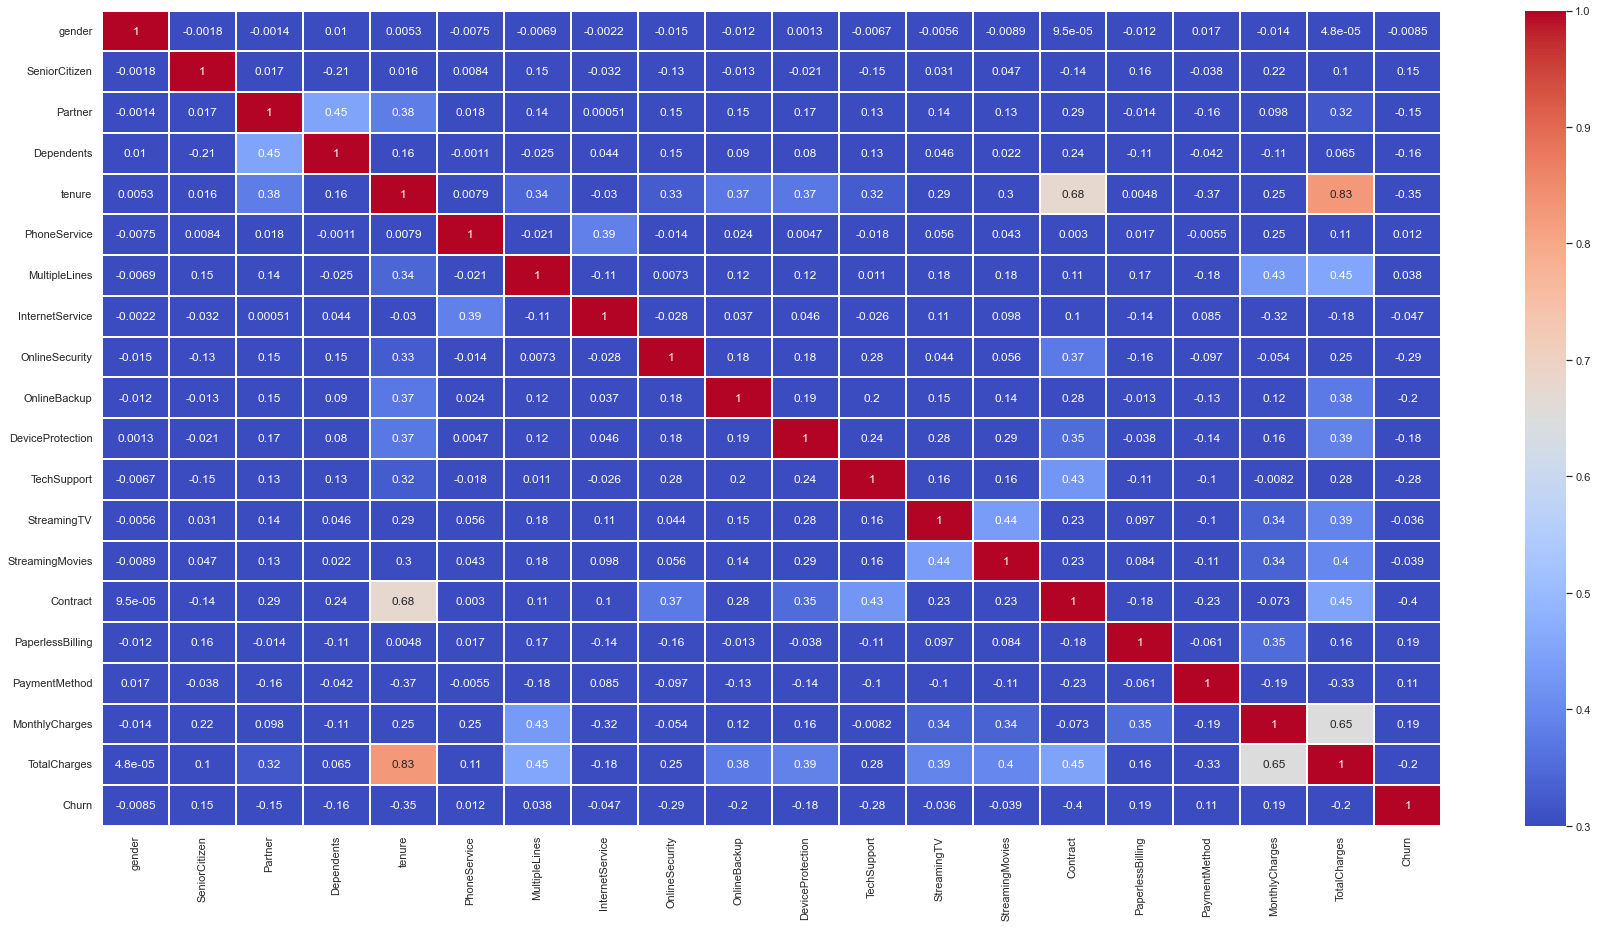

In [52]:
sns.set(style="white")
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

All the independent variables holds somewhere light correlation with each other along with the target variable "CHURN". Neither of the variable do have the strong correlatio with respect to the independent variables among themselves and target variable.

In [53]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

<AxesSubplot:ylabel='Density'>

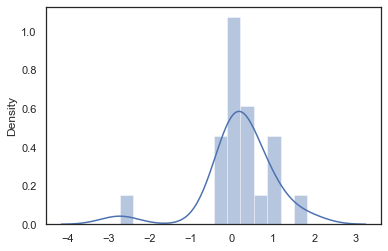

In [54]:
sns.distplot(df.skew())

Certain level of skewness is available in the dataset considering the threshold -0.5 to 0.5.

In [58]:
def dist(feature, frame, color='r'):
    plt.figure(figsize=(10,6))
    plt.title("Distribution for {}".format(feature))
    x = sns.distplot(frame[feature], color= color)

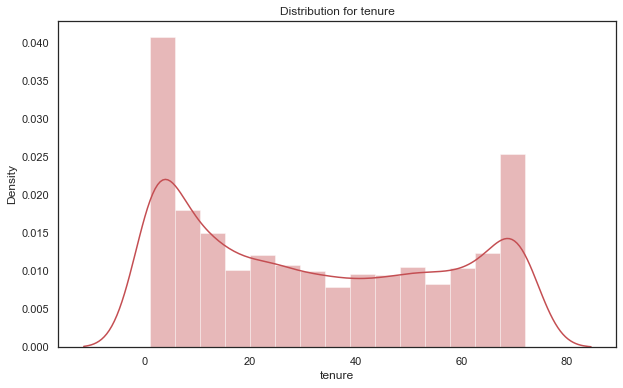

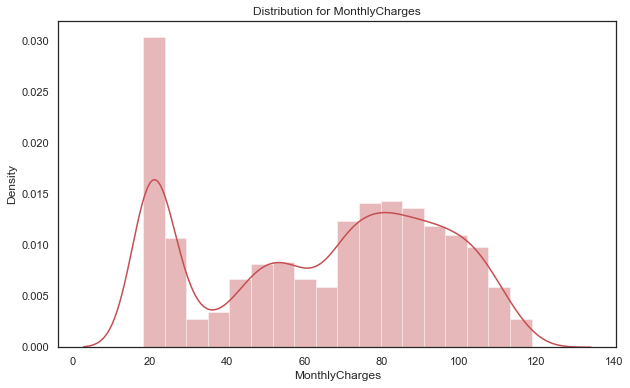

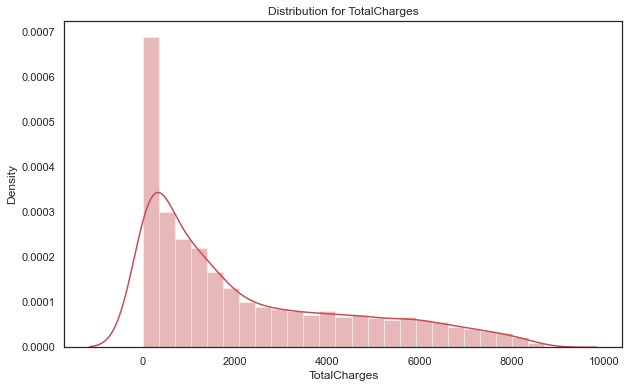

In [59]:
col =  ["tenure", 'MonthlyCharges', 'TotalCharges']
for features in col :dist(features, df)

Variables are not following the standard normal distribution. We will correct the distruibution being followed by the variables.

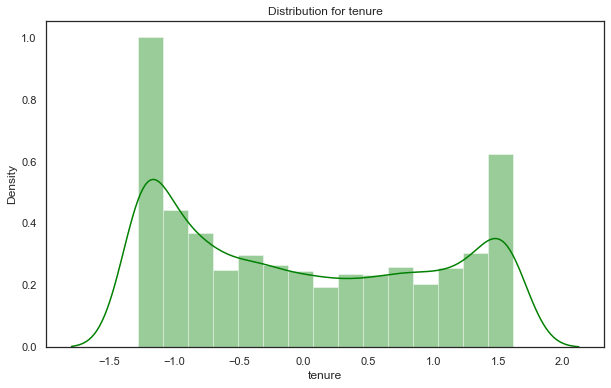

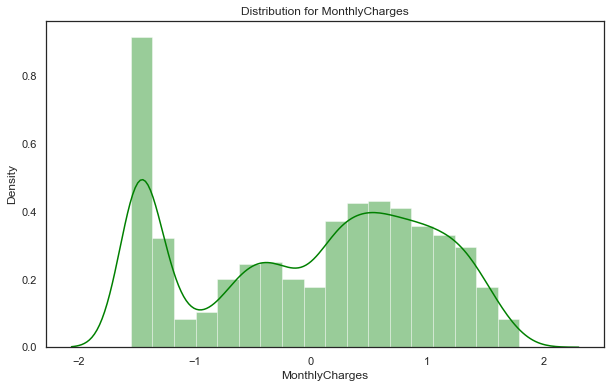

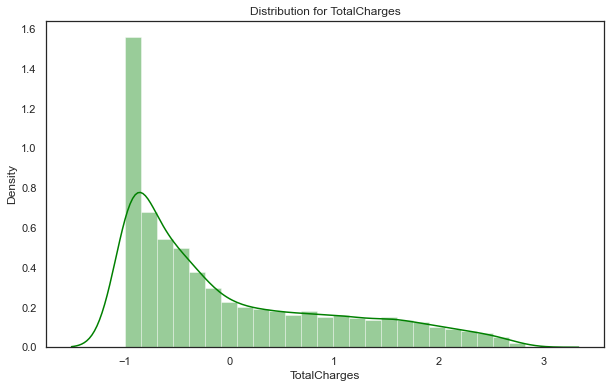

In [61]:
dfstd = pd.DataFrame(StandardScaler().fit_transform(df[col]).astype('float64'), columns = col)
for feat in col: dist(feat, dfstd, color='green')

# Dividing and splitting the dataset now: 

X includes the dataset with independent variables and Y includes the dataset with dependent variable. We will follow the test size a 80 Training / 20 Test ratio. Further we also ned to stratify the train-test-split to have a balanced split.

In [55]:
X = df.drop(columns = "Churn")
y = df["Churn"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [57]:
print('Length of X_train and x_test: ', len(X_train), len(X_test))
print('Length of y_train and y_test: ', len(y_train), len(y_test))

Length of X_train and x_test:  4922 2110
Length of y_train and y_test:  4922 2110


# Performing the standard scaling now - 

In [64]:
scaler = StandardScaler()
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])

# Model Instance: 

In [68]:
lr = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
lr_prediction = lr.predict_proba(X_test)
lr.score(X_test, y_test)

0.804739336492891

In [69]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("Gradient boost classifier", GradientBoostingClassifier()))

# Estimating the model results now: 

In [70]:
Accuracy = (502+77)*100/(502+55+70+77) 
print("Accuracy {:0.2f}%:",format(Accuracy))

Accuracy {:0.2f}%: 82.24431818181819


In [74]:
from sklearn.model_selection import KFold
acc_results =[]
auc_results =[]
names = []

result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
model_results = pd.DataFrame(columns = result_col)

i=0

for name, model in models:
    names.append(name)
    kfold = model_selection.KFold(n_splits=10, random_state=0,shuffle=True)
    
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, 
                    cv = kfold, scoring="accuracy")
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="roc_auc")
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    
    model_results.loc[i] = [name, 
                           round(cv_auc_results.mean()*100,2),
                           round(cv_auc_results.std()*100,2),
                           round(cv_acc_results.mean()*100,2),
                           round(cv_acc_results.std()*100,2)]
    i+=1

model_results.sort_values(by = ['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
7,Adaboost,84.60,2.81,80.33,2.18
8,Gradient boost classifier,84.48,2.87,80.66,2.31
0,Logistic Regression,84.45,2.85,74.73,1.45
1,SVC,83.35,3.03,79.62,2.84
6,Random Forest,82.81,2.44,79.50,1.82
4,Gaussian NB,82.17,3.27,75.23,2.48
2,Kernel SVM,80.21,3.41,79.60,2.29
3,KNN,76.89,3.29,76.13,2.31
5,Decision Tree Classifier,66.72,2.96,74.26,2.39


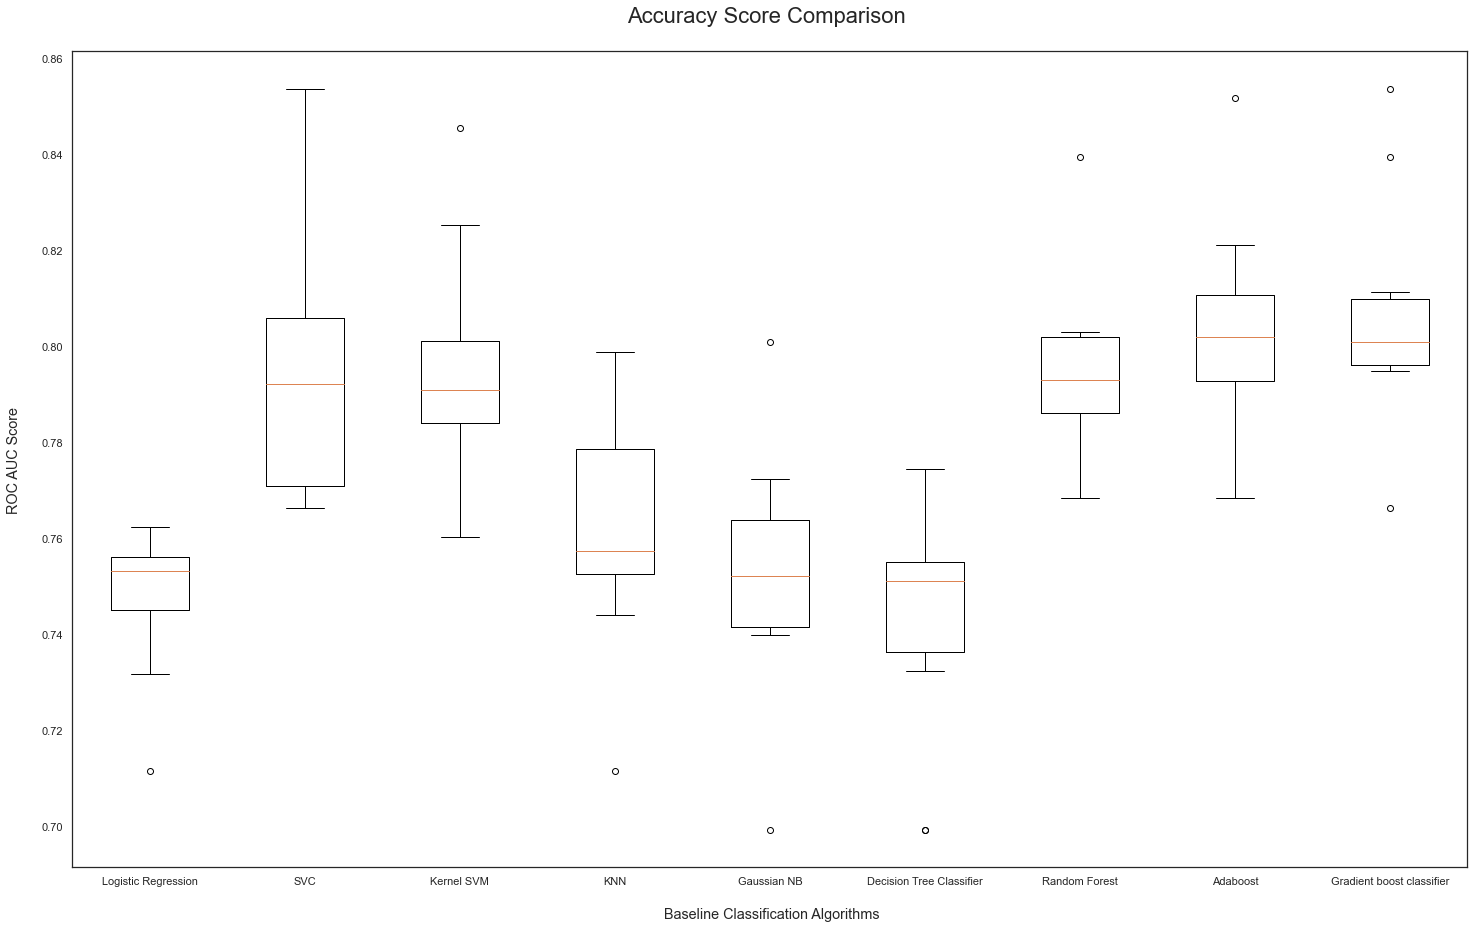

In [75]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

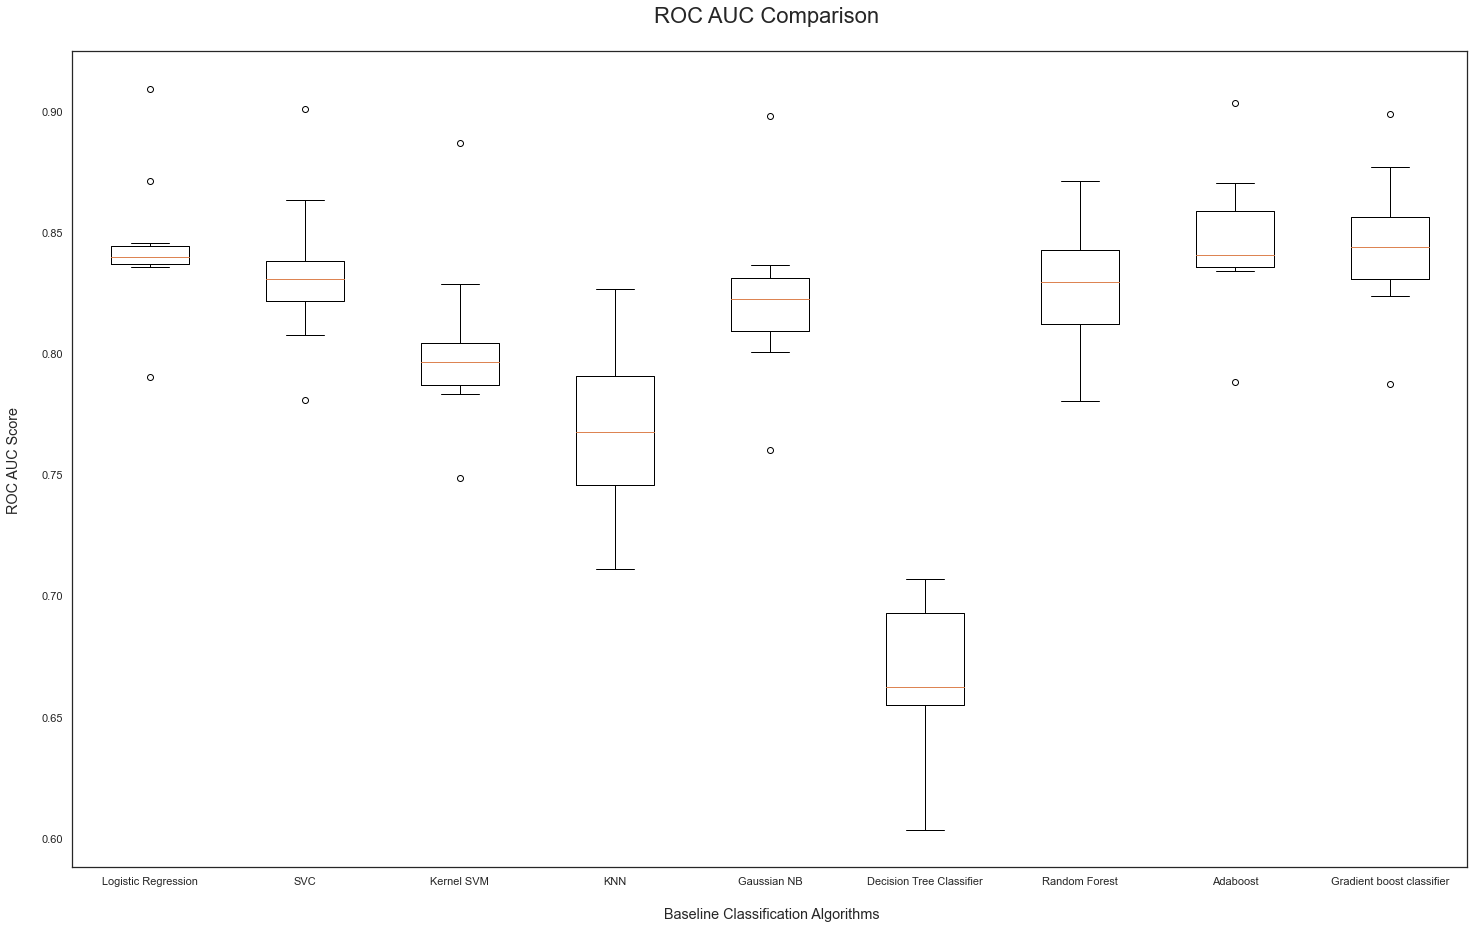

In [76]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('ROC AUC Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

We got the highest accuracy mean of KNN, AdaBoost Classifier. We will be following with that from now. 

# KNN Model: 

In [89]:
scorearray = []

for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
    knn_loop.fit(X_train,y_train)
    scorearray.append(knn_loop.score(X_test,y_test))

scorearray

[0.7199052132701422,
 0.7559241706161137,
 0.7507109004739336,
 0.7649289099526067,
 0.761611374407583,
 0.771563981042654,
 0.7625592417061612,
 0.7677725118483413,
 0.7606635071090048,
 0.7639810426540284,
 0.7639810426540284,
 0.7635071090047393,
 0.7696682464454976,
 0.7725118483412322,
 0.7720379146919432,
 0.7696682464454976,
 0.781042654028436,
 0.7786729857819905,
 0.7781990521327015,
 0.7772511848341233,
 0.776303317535545,
 0.7772511848341233,
 0.776303317535545,
 0.776303317535545]

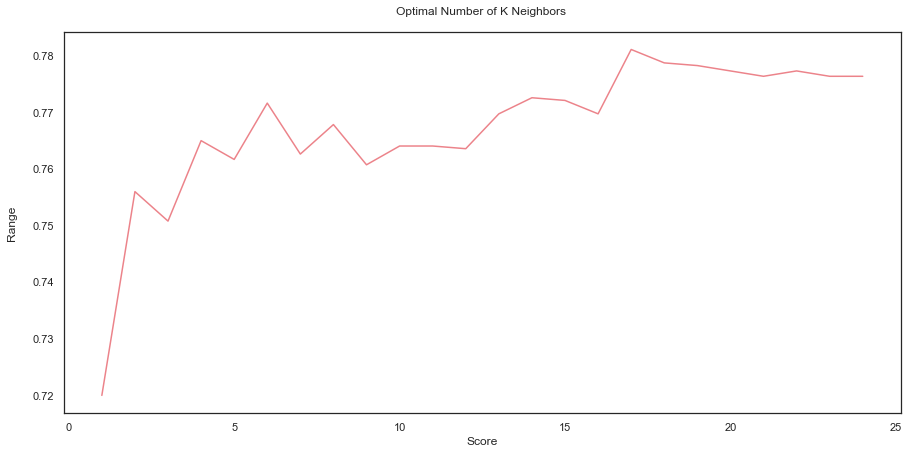

In [90]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),scorearray, color = '#ec838a')
plt.ylabel('Range\n')
plt.xlabel('Score\n')

plt.title('Optimal Number of K Neighbors \n',fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# Random Forest Classifier: 

In [91]:
scorearray = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    scorearray.append(rf_loop.score(X_test,y_test))

    
for i,j in enumerate(scorearray):
    print(i+1,":",j)  

1 : 0.7355450236966825
2 : 0.7573459715639811
3 : 0.7592417061611374
4 : 0.7691943127962085
5 : 0.7635071090047393
6 : 0.7677725118483413
7 : 0.7663507109004739
8 : 0.7601895734597156
9 : 0.7725118483412322
10 : 0.771090047393365
11 : 0.7739336492890996
12 : 0.7734597156398104
13 : 0.7739336492890996
14 : 0.7758293838862559
15 : 0.7729857819905214
16 : 0.7739336492890996
17 : 0.7725118483412322
18 : 0.7786729857819905
19 : 0.7781990521327015
20 : 0.781042654028436
21 : 0.7800947867298578
22 : 0.7772511848341233
23 : 0.7829383886255924
24 : 0.781042654028436
25 : 0.7786729857819905
26 : 0.7772511848341233
27 : 0.776303317535545
28 : 0.7739336492890996
29 : 0.7748815165876777
30 : 0.7753554502369668
31 : 0.7791469194312797
32 : 0.7748815165876777
33 : 0.7772511848341233
34 : 0.7753554502369668
35 : 0.7767772511848341
36 : 0.7744075829383886
37 : 0.7772511848341233
38 : 0.7777251184834123
39 : 0.7772511848341233
40 : 0.7786729857819905
41 : 0.776303317535545
42 : 0.7777251184834123
43 : 0

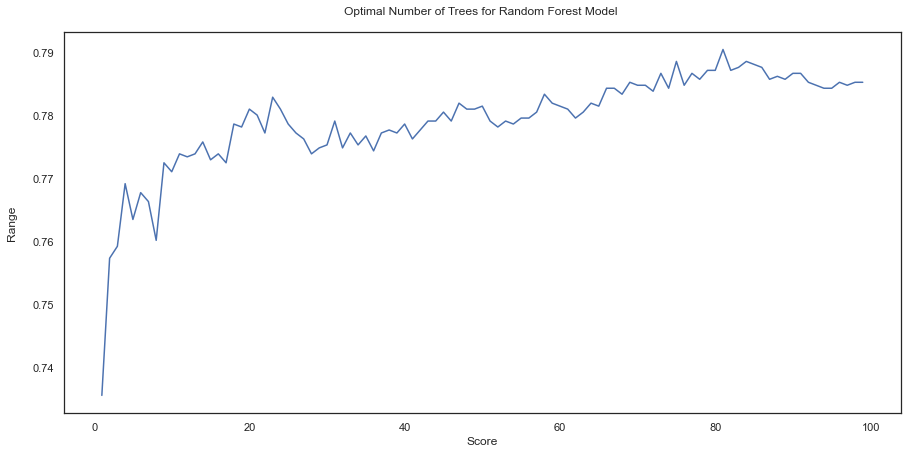

In [92]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),scorearray)
plt.ylabel('Range\n',fontfamily = "sans-serif")
plt.xlabel('Score\n',fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# Performing the second iteration: 

In [93]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

In [94]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

classifier3 = KNeighborsClassifier(n_neighbors=22, metric="minkowski", p=2)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)


classifier4 = SVC(kernel="rbf", random_state =0)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)


classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)

classifier6 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)

classifier7 = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
classifier7.fit(X_train, y_train)
y_pred7 = classifier7.predict(X_test)

classifier8 = AdaBoostClassifier()
classifier8.fit(X_train, y_train)
y_pred8 = classifier8.predict(X_test)

classifier9 = GradientBoostingClassifier()


classifier9.fit(X_train, y_train)
y_pred9 = classifier9.predict(X_test)

In [96]:
lr = model_evaluation(y_test, y_pred, "Logistic Regression")
svm = model_evaluation(y_test, y_pred2, "SVM (Linear)")
knn = model_evaluation(y_test, y_pred3, "K-Nearest Neighbours")
k_svm = model_evaluation(y_test, y_pred4, "Kernel SVM")
nb = model_evaluation(y_test, y_pred5, "Naive Bayes")
dt = model_evaluation(y_test, y_pred6, "Decision Tree")
rf = model_evaluation(y_test, y_pred7, "Random Forest")
ab = model_evaluation(y_test, y_pred8, "Adaboost")
gb = model_evaluation(y_test, y_pred9, "Gradient Boost")

In [97]:
eval =lr.append(svm).append(knn).append(k_svm).append(nb).append(dt).append(rf).append(ab).append(gb).sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False).reset_index().drop(columns = "index")
eval

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,Kernel SVM,0.795261,0.704301,0.448630,0.548117,0.483752
1,Logistic Regression,0.804739,0.680672,0.554795,0.611321,0.576102
2,Adaboost,0.800000,0.677632,0.529110,0.594231,0.553367
3,Gradient Boost,0.787204,0.660333,0.476027,0.553234,0.504171
4,SVM (Linear),0.792417,0.657328,0.522260,0.582061,0.544643
5,Random Forest,0.782938,0.656716,0.452055,0.535497,0.482104
6,K-Nearest Neighbours,0.777251,0.644670,0.434932,0.519427,0.465201
7,Naive Bayes,0.757346,0.546272,0.727740,0.624082,0.682402
8,Decision Tree,0.713270,0.481739,0.474315,0.477998,0.475782


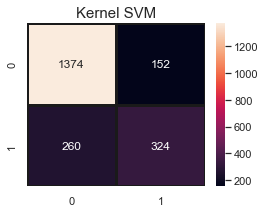

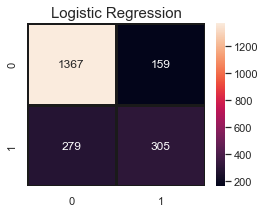

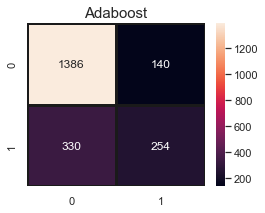

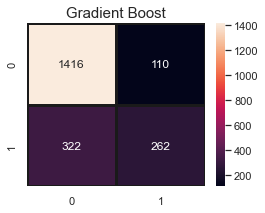

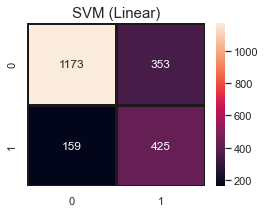

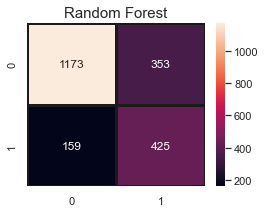

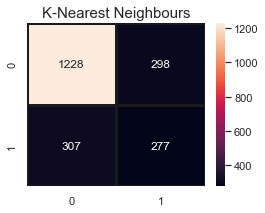

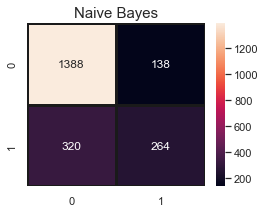

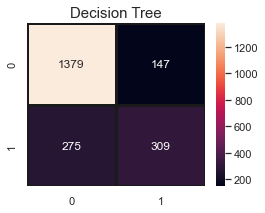

In [99]:
pred = [y_pred, y_pred2 , y_pred3, y_pred4, y_pred5, y_pred5, y_pred6, y_pred7,
              y_pred8, y_pred9]

for i, j in zip(pred, eval.Model.values):
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, i),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
    plt.title(j,fontsize=15)
    plt.show()

# K-Fold Cross Validation: 

In [100]:
def cross_validation(classifier_name, name):
    accuracies = cross_val_score(estimator=classifier_name,
                            X=X_train, y=y_train, cv =10)
    print(name, "accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

In [101]:
cross_validation(classifier8, "Adaboost")

Adaboost accuracy: 0.80 (+/- 0.03)


In [102]:
cross_validation(classifier9, "Gradient Boost classifier")

Gradient Boost classifier accuracy: 0.80 (+/- 0.02)


In [103]:
cross_validation(classifier, "Logistic regression")

Logistic regression accuracy: 0.80 (+/- 0.01)


In [104]:
cross_validation(classifier4, "Kernel SVM")

Kernel SVM accuracy: 0.80 (+/- 0.02)


# Making ROC curve to understand in more dynamic manner: 

In [106]:
# ROC Curve

def ROC_curve(classifier_, name, y_pred_):
    classifier_.fit(X_train, y_train) 
    probs = classifier_.predict_proba(X_test) 
    probs = probs[:, 1] 
    classifier_roc_auc = roc_auc_score(y_test, probs )
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_.predict_proba(X_test)[:,1])
    plt.figure(figsize=(14, 6))

    label_ = name + '(area = %0.2f)' % classifier_roc_auc

    plt.plot(rf_fpr, rf_tpr, 
    label=label_)
  
    plt.plot([0,1], [0,1],label='Base Rate' 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate \n')

    plt.xlabel('\nFalse Positive Rate \n')

    plt.title('ROC Graph \n')

    plt.legend(loc="lower right", fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.show()

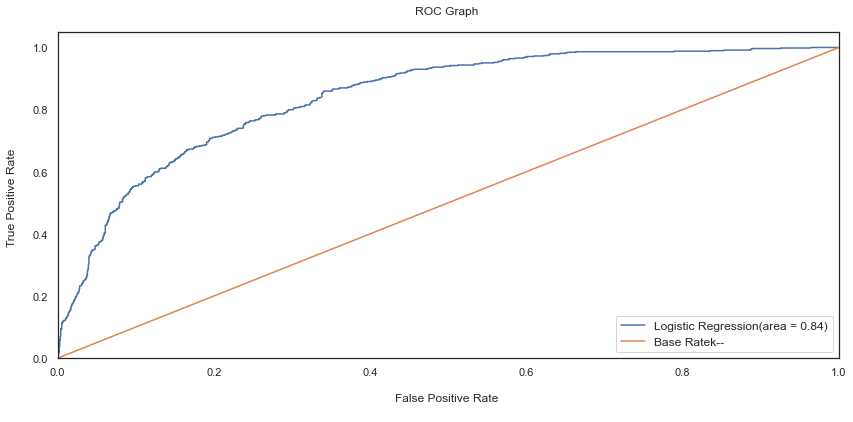

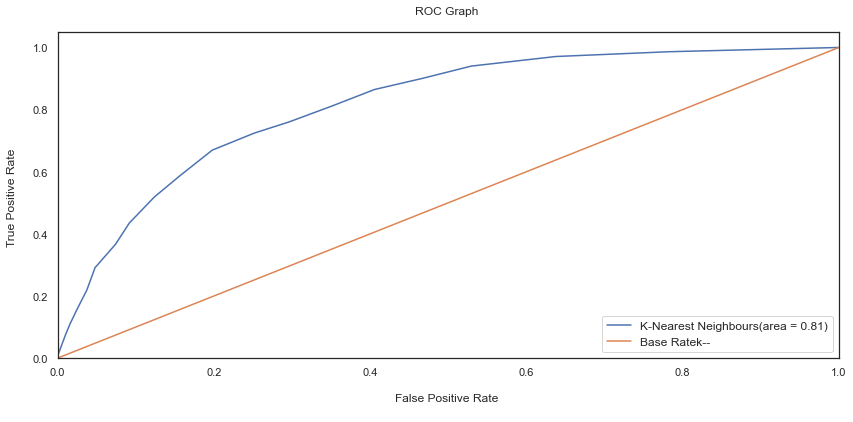

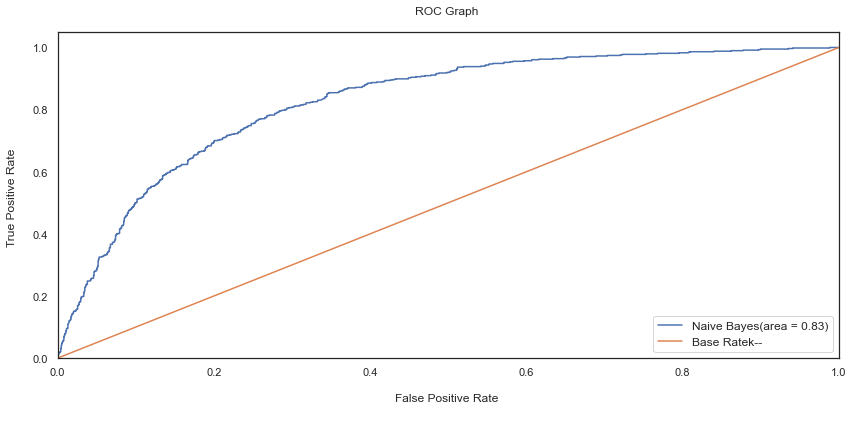

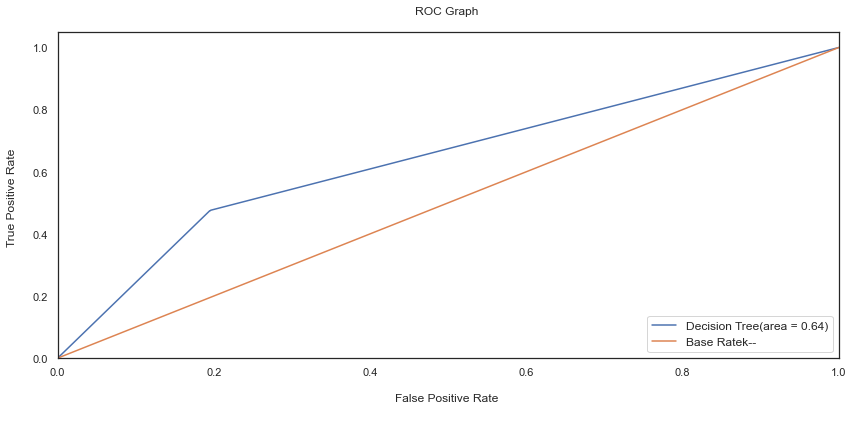

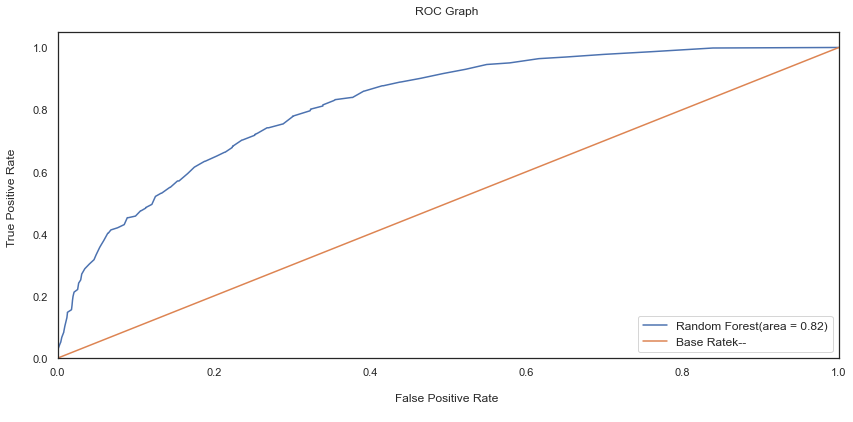

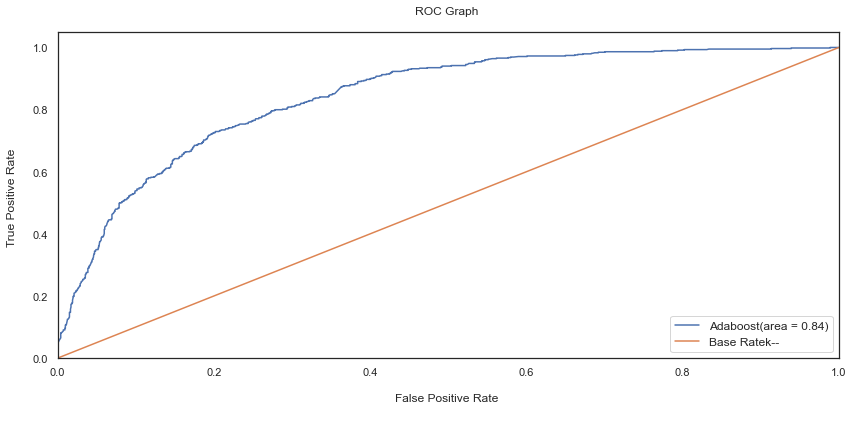

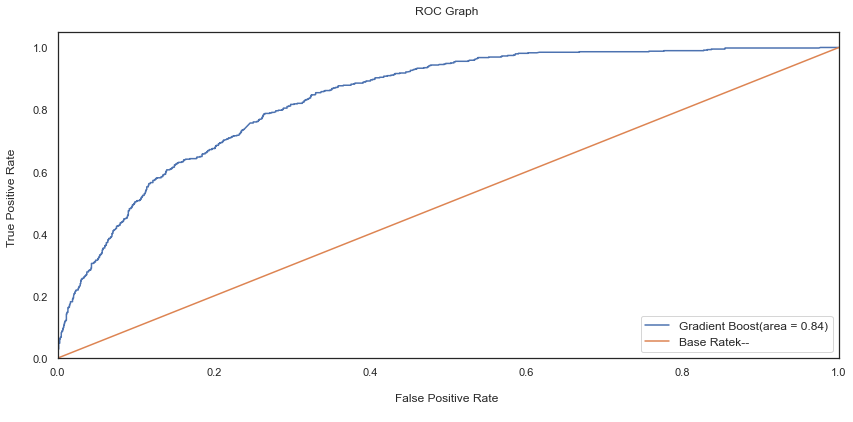

In [110]:
preds = [y_pred, y_pred3,  y_pred5, y_pred6, y_pred7,
              y_pred8, y_pred9]
classifiers = [classifier , classifier3, classifier5, classifier6, classifier7,
             classifier8, classifier9]
model_names_ = ["Logistic Regression",  "K-Nearest Neighbours","Naive Bayes",
               "Decision Tree", "Random Forest", "Adaboost", "Gradient Boost"]

for i, j, k in zip(classifiers, model_names_, pred):
    ROC_curve(i, j, k) 

# Cross Validation: 

In [112]:

def cvDict(functions, scr, X_train = X, y_train = y, cv = 5):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

cvD = cvDict(classifiers, scr = 'roc_auc')
cvD

{'LogisticRegression': [0.841403874176992, 0.010541374974649749],
 'KNeighborsClassifier': [0.7911664674294905, 0.008167885535110067],
 'GaussianNB': [0.8232386881685605, 0.00741678015498337],
 'DecisionTreeClassifier': [0.6470213137060805, 0.02196953973039052],
 'RandomForestClassifier': [0.8197874155380965, 0.011556155864106703],
 'AdaBoostClassifier': [0.8445838813774079, 0.01125665302188384],
 'GradientBoostingClassifier': [0.8446124934116679, 0.0107289793503407]}

# AdaBoost Classifier: 

In [114]:
feature = pd.concat([pd.DataFrame(df.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier8.feature_importances_), columns = ["coef"])],axis = 1)
feature.sort_values(by = "coef", ascending = False)

,features,coef
18,TotalCharges,0.24
17,MonthlyCharges,0.24
4,tenure,0.20
14,Contract,0.12
16,PaymentMethod,0.04
8,OnlineSecurity,0.04
1,SeniorCitizen,0.02
15,PaperlessBilling,0.02
11,TechSupport,0.02
9,OnlineBackup,0.02


# Performing HyperParameter Tuning: 

We are following AdaBoost Classifier further since its score after cross validation is the highest.

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
adaHyperParams = {'n_estimators': [10,50,100,200,420], "learning_rate":  [0.001, 0.01, 0.1, 0.3]}
gridSearch = RandomizedSearchCV(estimator = classifier8, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc') # other option accuracy
gridSearch.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.3],
                                        'n_estimators': [10, 50, 100, 200,
                                                         420]},
                   scoring='roc_auc')

In [116]:
gridSearch.best_params_, gridSearch.best_score_

({'n_estimators': 50, 'learning_rate': 0.3}, 0.8459589576416764)

In [117]:
bestAdaMod = gridSearch.best_estimator_.fit(X_train, y_train)

In [119]:
test = bestAdaMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test , average = 'macro', sample_weight = None)

0.8460441390330168

The best score we got after hyperparameter tuning is 84%. AdaBoost Classifier is the best model for predicting the churn.